In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mpl_toolkits
%matplotlib inline

In [123]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [124]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [125]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [126]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [127]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [128]:
data['sqft_above'].fillna(data['sqft_above'].mean(), inplace=True)

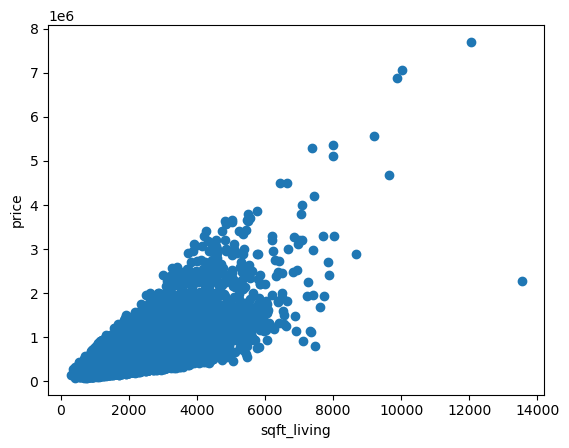

In [129]:
plt.scatter(data.sqft_living,data.price)
plt.xlabel("sqft_living")
plt.ylabel('price')
plt.show()

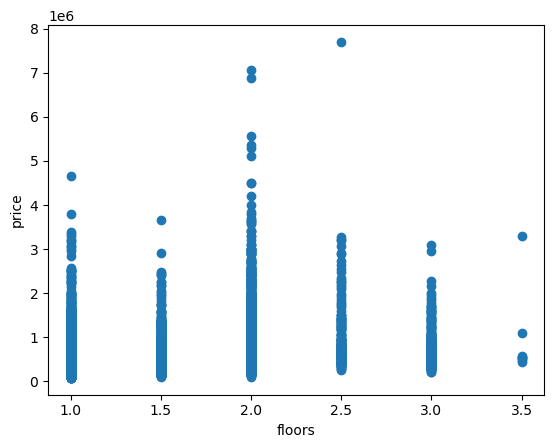

In [130]:
plt.scatter(data.floors,data.price)
plt.xlabel("floors")
plt.ylabel('price')
plt.show()

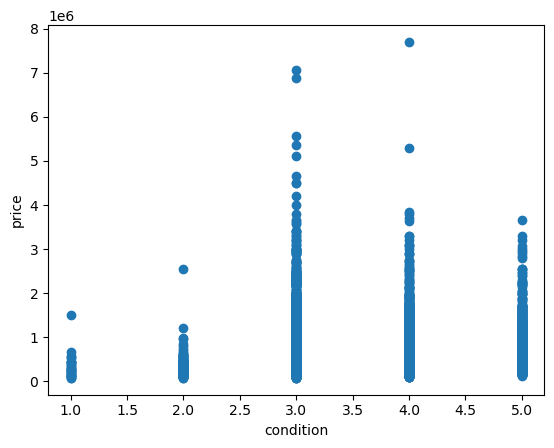

In [131]:
plt.scatter(data.condition,data.price)
plt.xlabel("condition")
plt.ylabel('price')
plt.show()

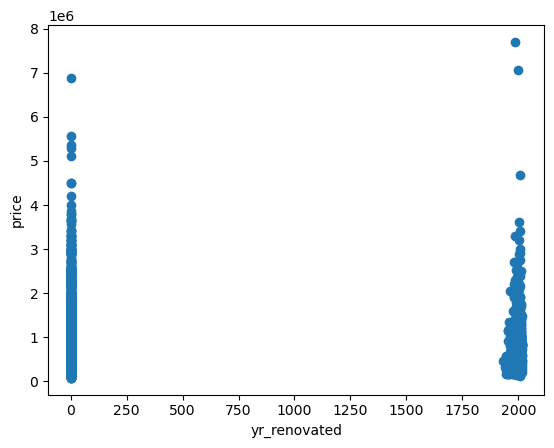

In [132]:
plt.scatter(data.yr_renovated,data.price)
plt.xlabel("yr_renovated")
plt.ylabel('price')
plt.show()

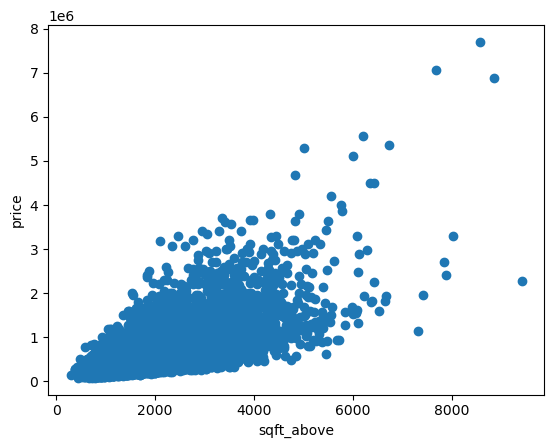

In [133]:
plt.scatter(data.sqft_above,data.price)
plt.xlabel("sqft_above")
plt.ylabel('price')
plt.show()

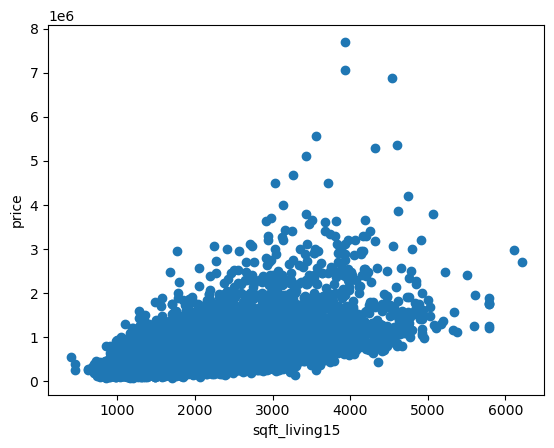

In [134]:
plt.scatter(data.sqft_living15,data.price)
plt.xlabel("sqft_living15")
plt.ylabel('price')
plt.show()

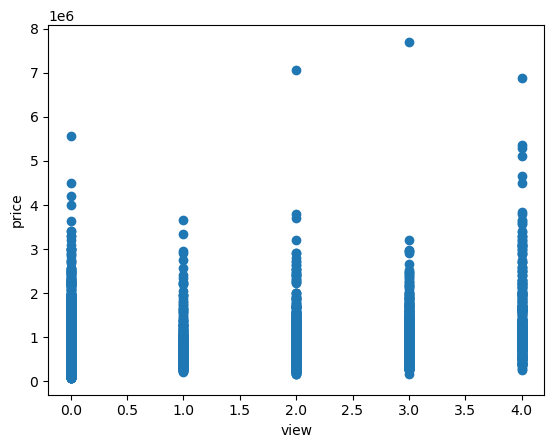

In [135]:
plt.scatter(data.view,data.price)
plt.xlabel("view")
plt.ylabel('price')
plt.show()

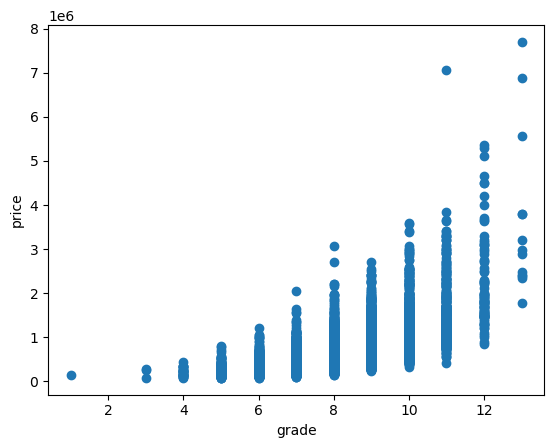

In [136]:
plt.scatter(data.grade,data.price)
plt.xlabel("grade")
plt.ylabel('price')
plt.show()

<AxesSubplot:>

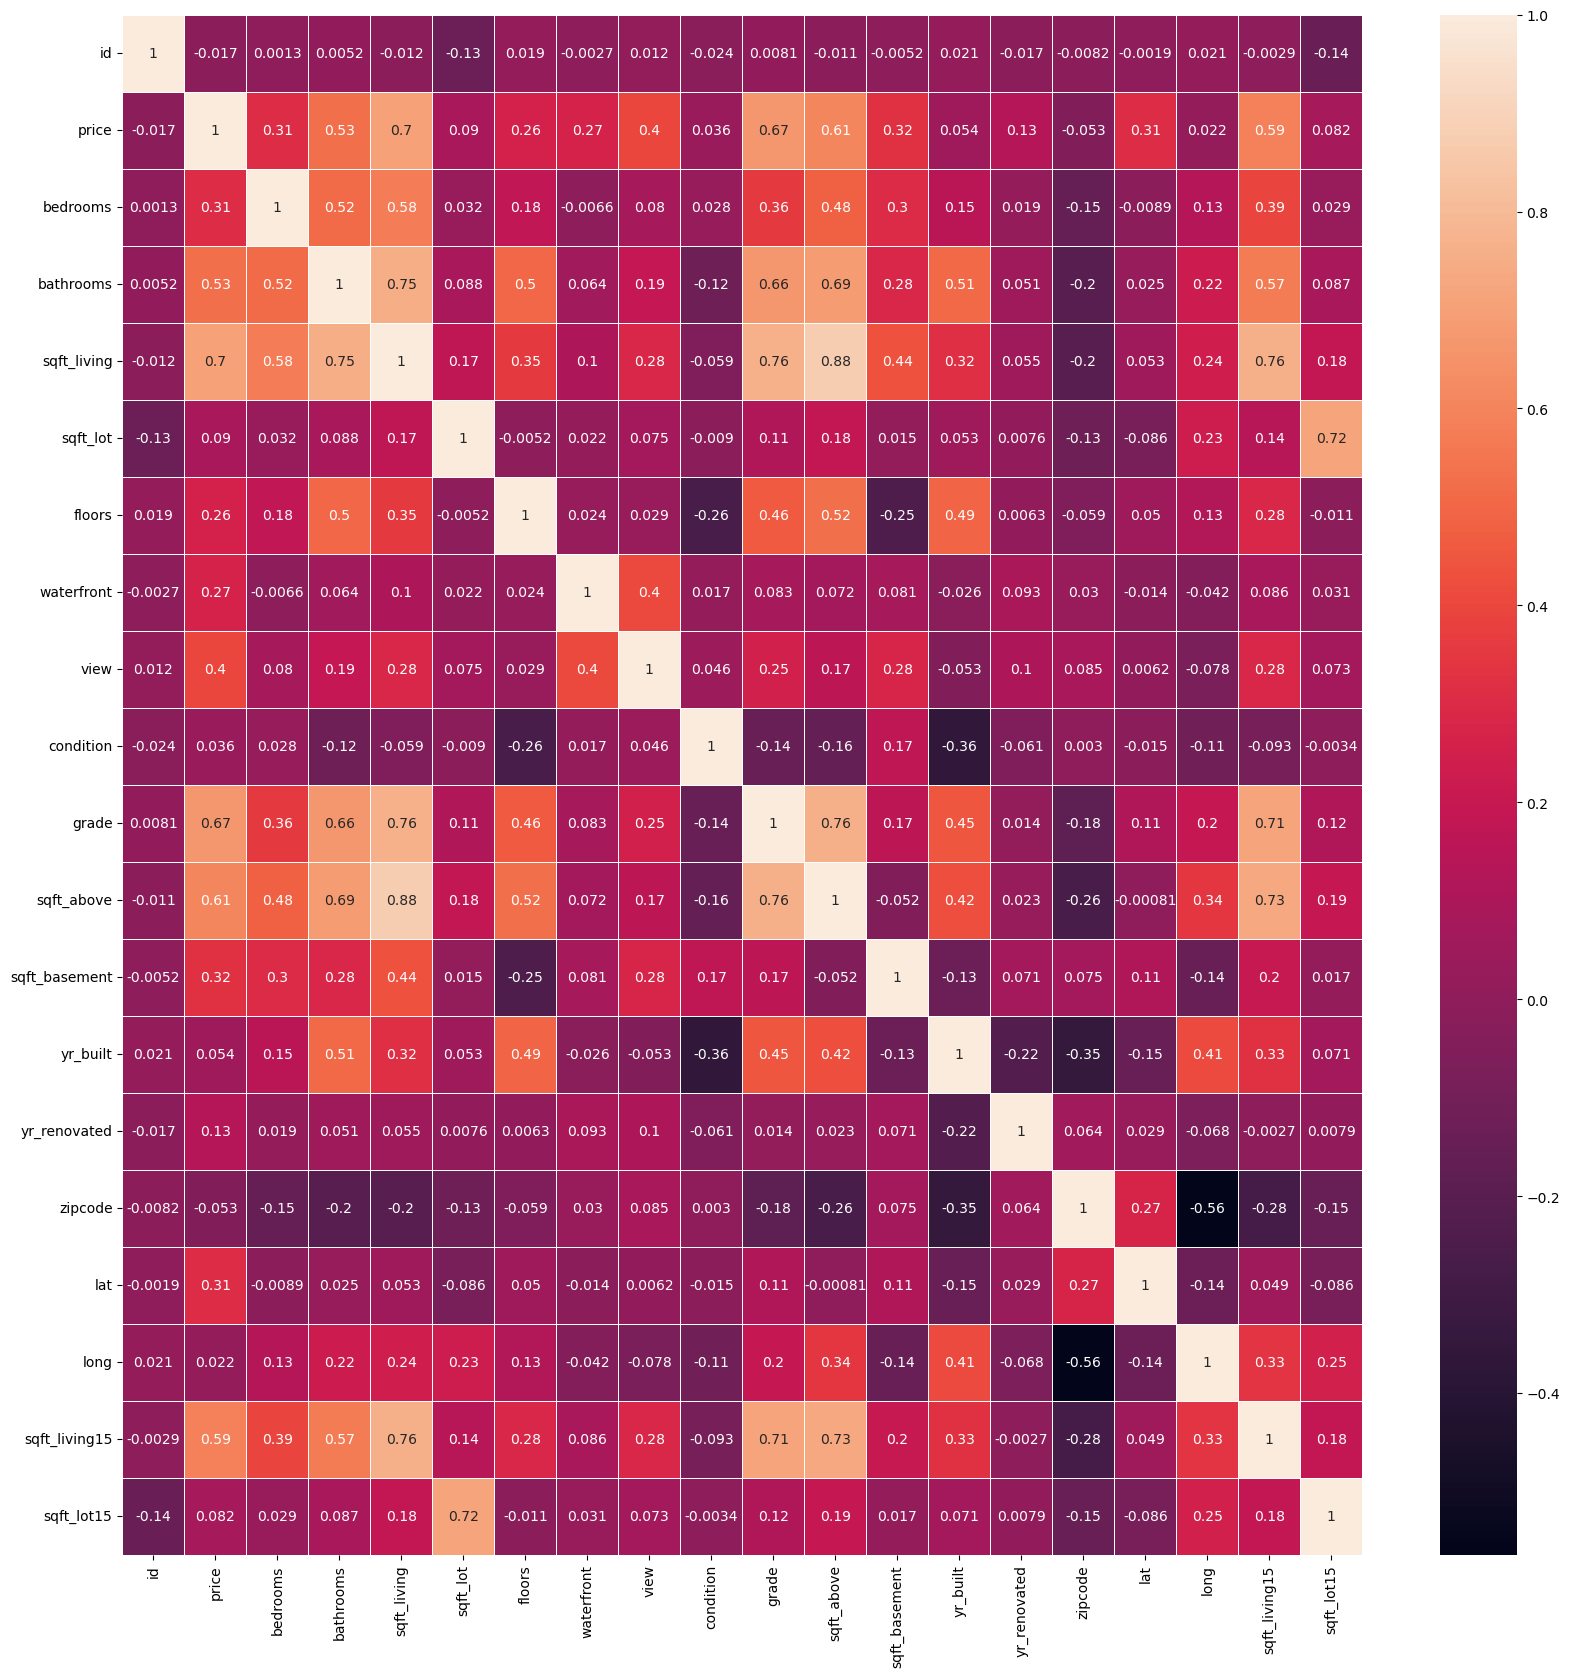

In [137]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True , linewidths=.5, ax=ax)

In [138]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = data[features ]
Y = data['price']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.15,random_state =2)

In [139]:
print(X)

       floors  waterfront      lat  bedrooms  sqft_basement  view  bathrooms  \
0         1.0           0  47.5112         3              0     0       1.00   
1         2.0           0  47.7210         3            400     0       2.25   
2         1.0           0  47.7379         2              0     0       1.00   
3         1.0           0  47.5208         4            910     0       3.00   
4         1.0           0  47.6168         3              0     0       2.00   
...       ...         ...      ...       ...            ...   ...        ...   
21608     3.0           0  47.6993         3              0     0       2.50   
21609     2.0           0  47.5107         4              0     0       2.50   
21610     2.0           0  47.5944         2              0     0       0.75   
21611     2.0           0  47.5345         3              0     0       2.50   
21612     2.0           0  47.5941         2              0     0       0.75   

       sqft_living15  sqft_above  grade

In [140]:
print(Y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [141]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [142]:
train_data_prediction = model.predict(x_train)
r2_train = metrics.r2_score(y_train, train_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.6529692946375374


In [143]:
test_data_prediction = model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.682699075238069


In [144]:
## "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,
## "bathrooms","sqft_living15","sqft_above","grade","sqft_living"

floors = input("enter the no.of floors : ")
waterfront = input("Is there any waterfront?: Yes/No -->")
latitude = input("enter the latitude co-ordinates: ")
bedrooms = input("How many bedrooms? : ")
sqft_basement = input("enter sqft of basement: ")
view = input("enter the views: ")
bathrooms = input("How many bathrooms? : ")
sqft_living15 = input("sqft_living space in 2015: ")
sqft_above = input("enter the sqft_above: ")
grade = input("enter grade of the house: ")
sqft_living = input("enter the sqft_living space: ")

if waterfront.lower() in ['y', 'yes']:
    int_waterfront = 1
else:
    int_waterfront = 0

input_data = (floors,int_waterfront,latitude,bedrooms,sqft_basement,view,
              bathrooms,sqft_living15,sqft_above,grade,sqft_living)

## changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)


print('Sale Price is Rs.', prediction[0])
    

enter the no.of floors : 2
Is there any waterfront?: Yes/No -->Yes
enter the latitude co-ordinates: 47.5773
How many bedrooms? : 3
enter sqft of basement: 0
enter the views: 0
How many bathrooms? : 2.5
sqft_living space in 2015: 7502
enter the sqft_above: 1150
enter grade of the house: 8
enter the sqft_living space: 1715
Item_Outlet_Sales Value is Rs. 1070717.7766036503


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
